In [2]:
import pickle
import numpy
import matplotlib.pyplot as plt
import seaborn
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [3]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


In [15]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)



{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [34]:
### the input features we want to use
### can be any key in the person-level dictionary (salary, director_fees, etc.)
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

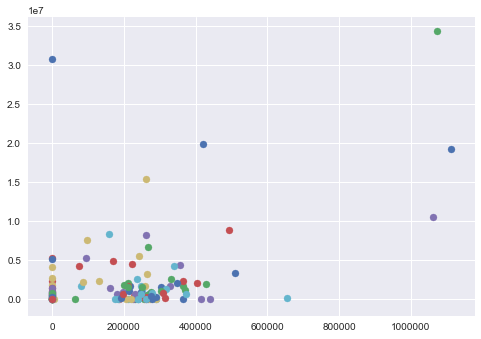

In [38]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2)
plt.show()


In [58]:
salary = []
exercised_stock_options = []
for key in data_dict:
    value = data_dict[key]['exercised_stock_options']
    if value != 'NaN':
        exercised_stock_options.append(float(value))
    
    value = data_dict[key]['salary']
    if value != 'NaN':
        salary.append(float(value))        
    
print 'Max and Min exercised_stock_options'
print 'Maximo:',max(exercised_stock_options)
print 'Minimo:',min(exercised_stock_options)
print ''
print 'Max and Min exercised_stock_options'
print 'Maximo:',max(salary)
print 'Minimo:',min(salary)



Max and Min exercised_stock_options
Maximo: 34348384.0
Minimo: 3285.0

Max and Min exercised_stock_options
Maximo: 1111258.0
Minimo: 477.0


In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(finance_features)
pred = kmeans.predict(finance_features)

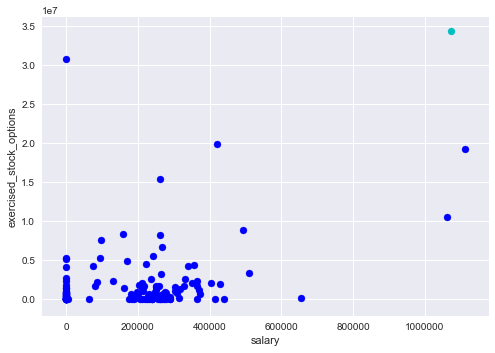

In [60]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")